# 1. The LASSO and Boosting for Regression

## (a) Use the first 1495 rows of data as the training set and the rest as the test set.## 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read all dataset

dataset=pd.read_csv("communities.data",header=None)
#read the dataset description, the first five columns are non-predictor
dataset.drop([0,1,2,3,4], axis=1, inplace=True)
#process none value
dataset.replace('?', np.nan, inplace=True)
dataset

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [3]:
#split dataset into training data and test data
train_data= dataset.iloc[:1495,:]
test_data = dataset.iloc[1945:,:]
train_data

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [4]:
from sklearn.impute import SimpleImputer
# Using median to impute missing values
imp = SimpleImputer(missing_values=np.nan,strategy="median")
imp.fit(train_data)
#process the round of data
train_data = pd.DataFrame(imp.transform(train_data)).round(2)
imp.fit(test_data)
test_data = pd.DataFrame(imp.transform(test_data)).round(2)
train_data

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.07,0.03,0.76,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.07,0.03,0.76,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.07,0.03,0.76,0.5,0.00,0.15,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.07,0.03,0.76,0.5,0.00,0.15,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.07,0.03,0.76,0.5,0.00,0.15,0.03


## (c) Plot a correlation matrix for the features in the data set.

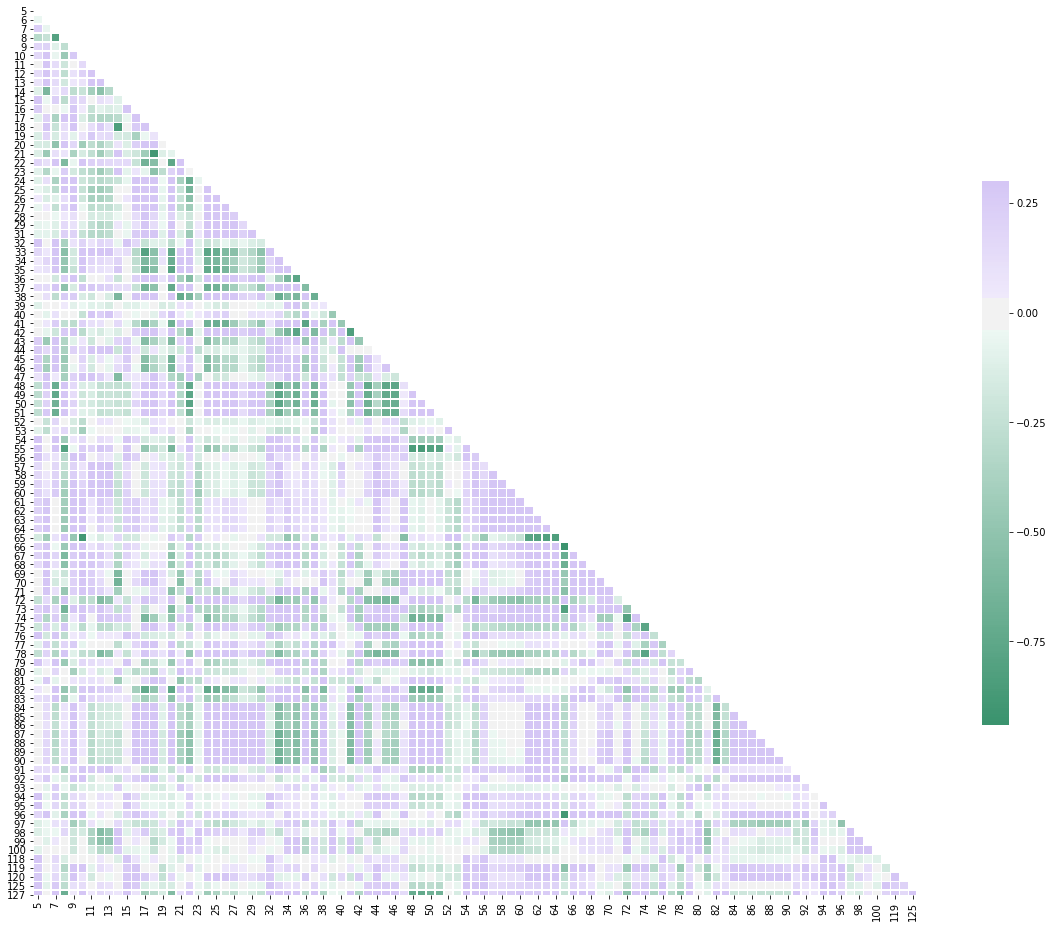

In [5]:
# Correlation Matrix
corr = dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#setup a figure
f, ax = plt.subplots(figsize=(20, 20))
#Generate a brighter green-white-purple palette
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
# Draw a plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean

In [6]:
pure_data=train_data.drop([122],axis=1)
#announce a cv method
cv = lambda x: np.std(x) / np.mean(x) 
#apply cv 
var = np.apply_along_axis(cv, axis = 1, arr = np.array(pure_data).T)
print("the Coefficient of Variation CV for each feature :\n")
pd_var=pd.DataFrame(var, columns=["varation"])
pd_var

the Coefficient of Variation CV for each feature :



,varation
0,2.240355
1,0.355681
2,1.428407
3,0.330102
4,1.358645
...,...
117,1.644957
118,0.111995
119,0.334992
120,2.552092


## (e) Pickup 128**1/2 features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [7]:
import math
import types
#calculate the number of feature we should pick
pick_up_number=math.floor(pow(128,0.5))
#rank
ranks = pd_var.rank(ascending=False)
select_feature = np.array(ranks < 12).T
#selected train_feature
train_top11_features = pure_data.iloc[: ,select_feature[0]]
train_top11_features

,0,10,27,49,51,71,89,90,96,108,120
0,0.19,0.20,0.08,0.04,0.03,0.21,0.04,0.00,0.03,0.10,0.32
1,0.00,0.02,0.01,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.00
2,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.02,0.00,0.00
3,0.04,0.06,0.01,0.03,0.02,0.01,0.00,0.00,0.02,0.00,0.00
4,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00
1491,0.16,0.18,0.08,0.04,0.15,0.06,0.09,0.03,0.02,0.12,0.61
1492,0.01,0.00,0.04,0.03,0.00,0.05,0.00,0.00,0.02,0.00,0.00
1493,0.06,0.07,0.01,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.00


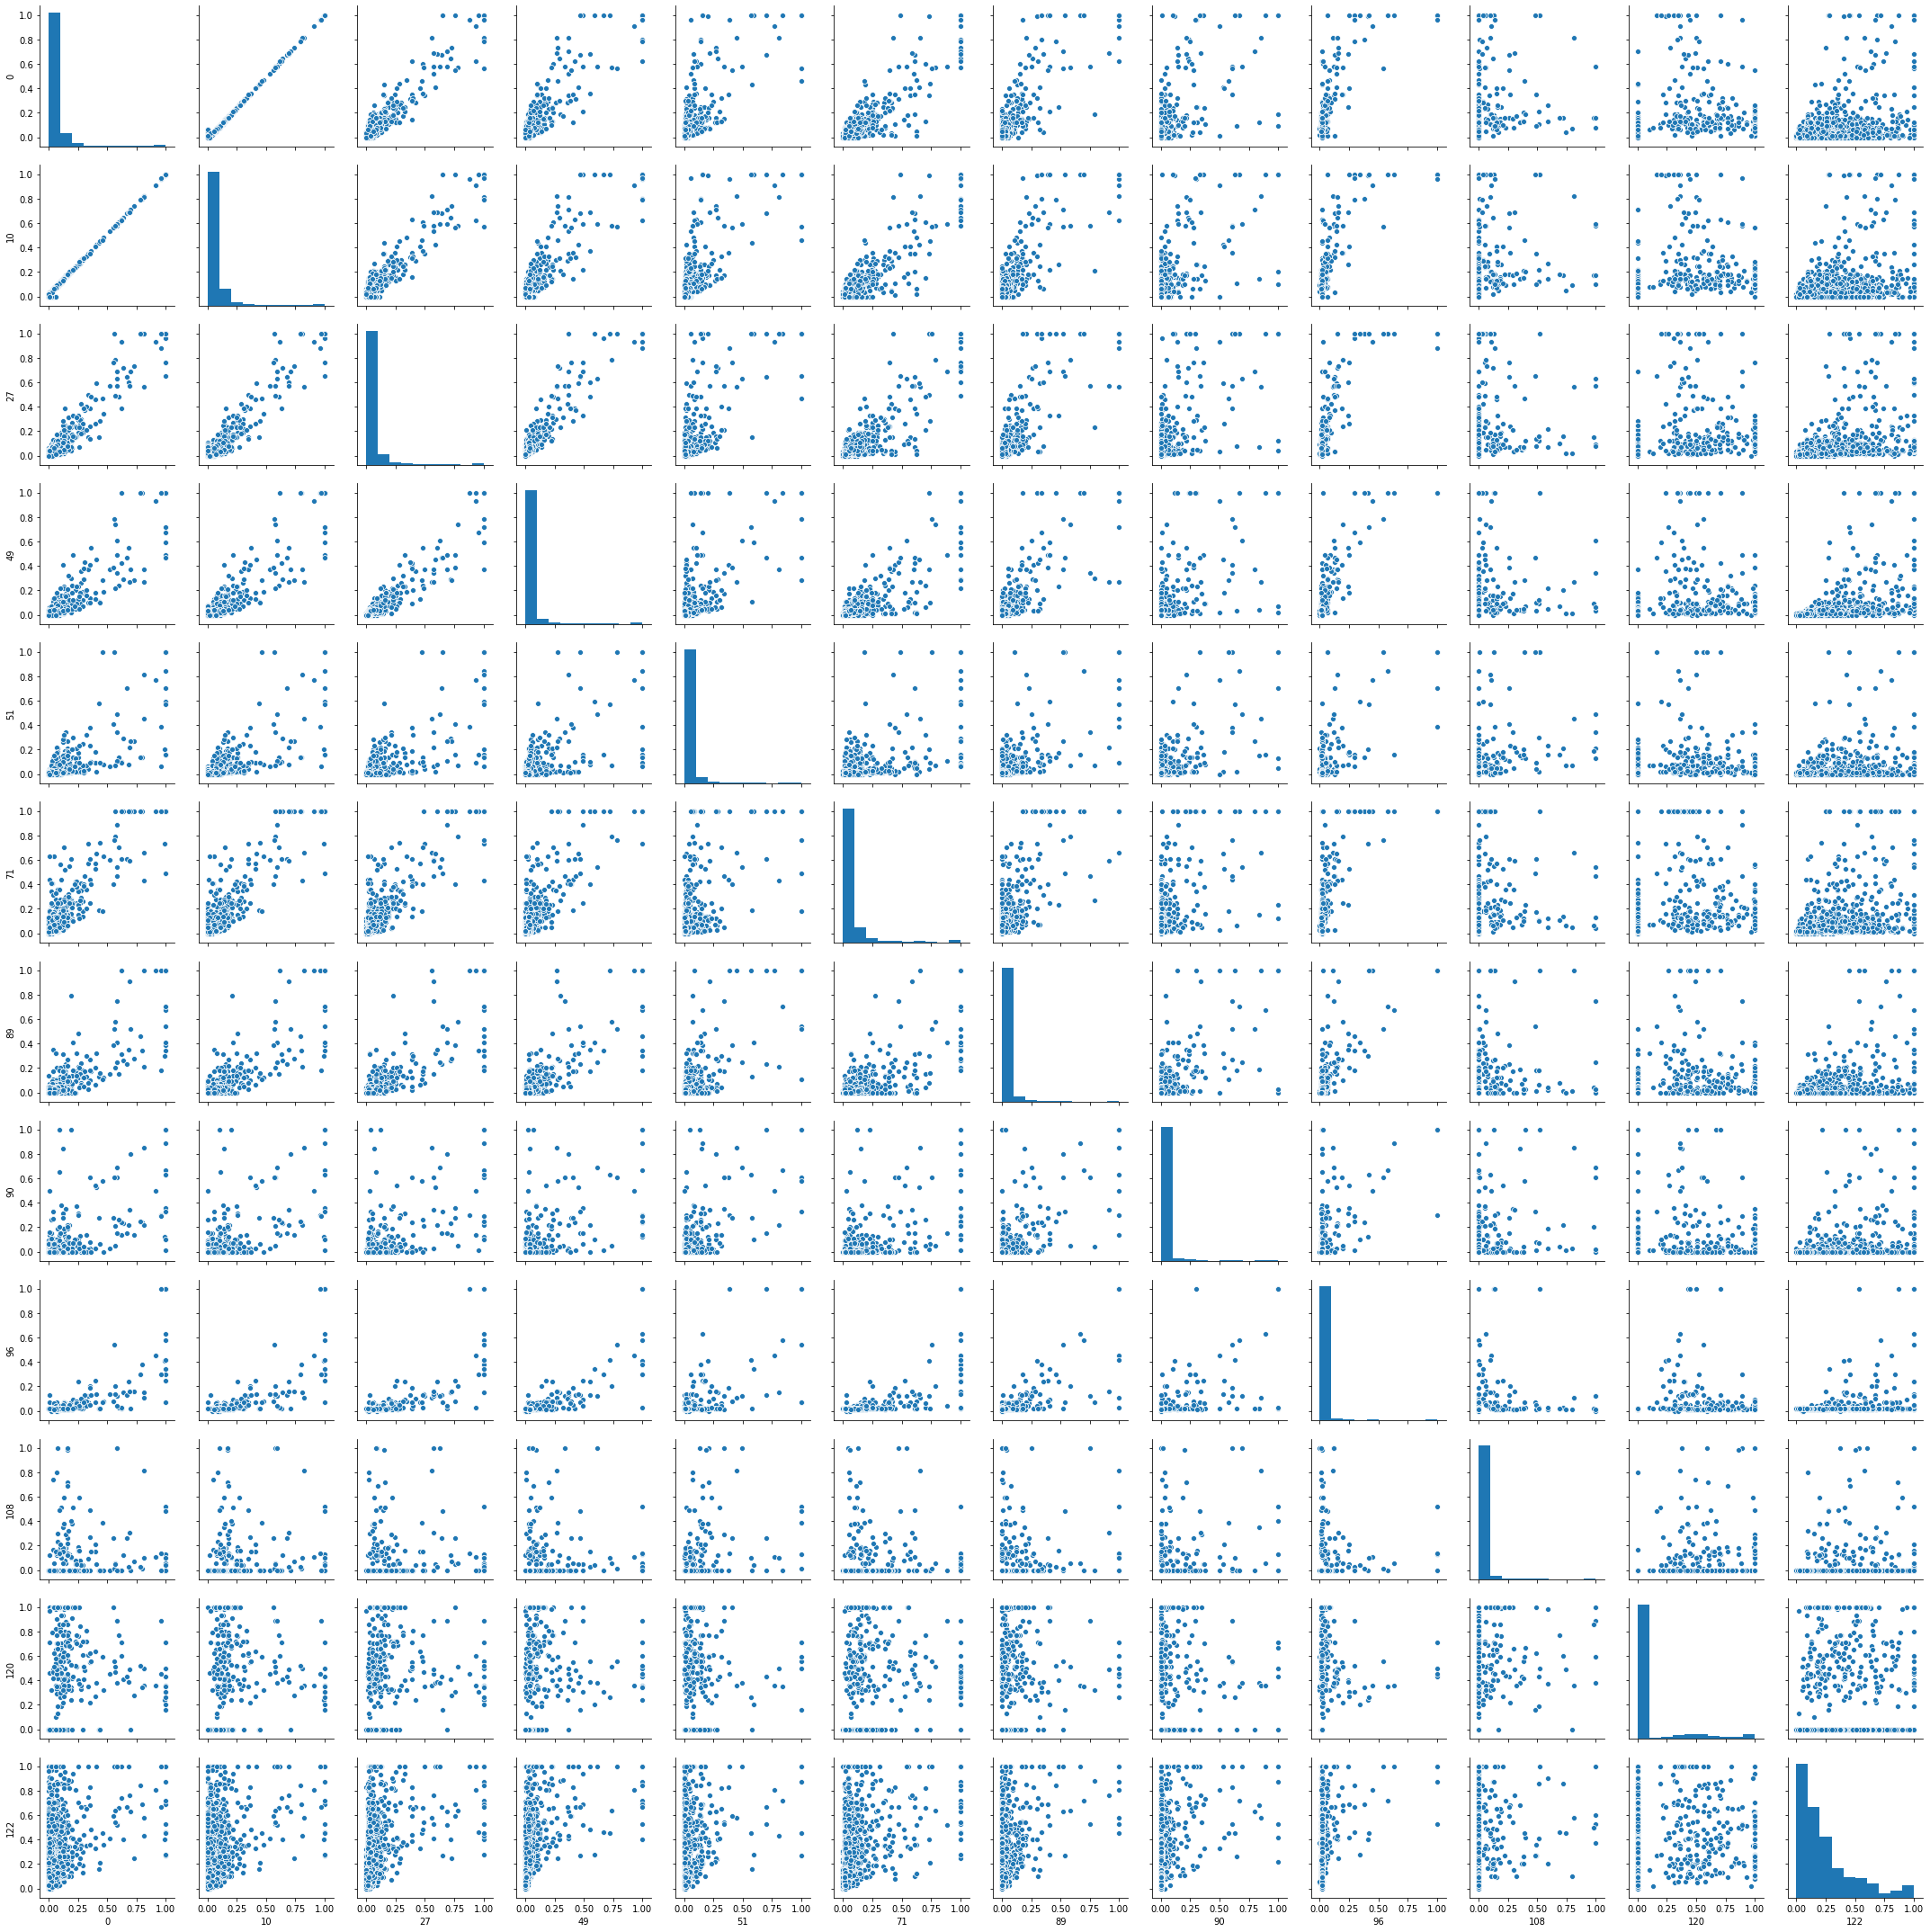

In [8]:
#scatter plot
#paint them in the same plot
sns.pairplot(pd.concat([train_top11_features, train_data[122]], axis=1))


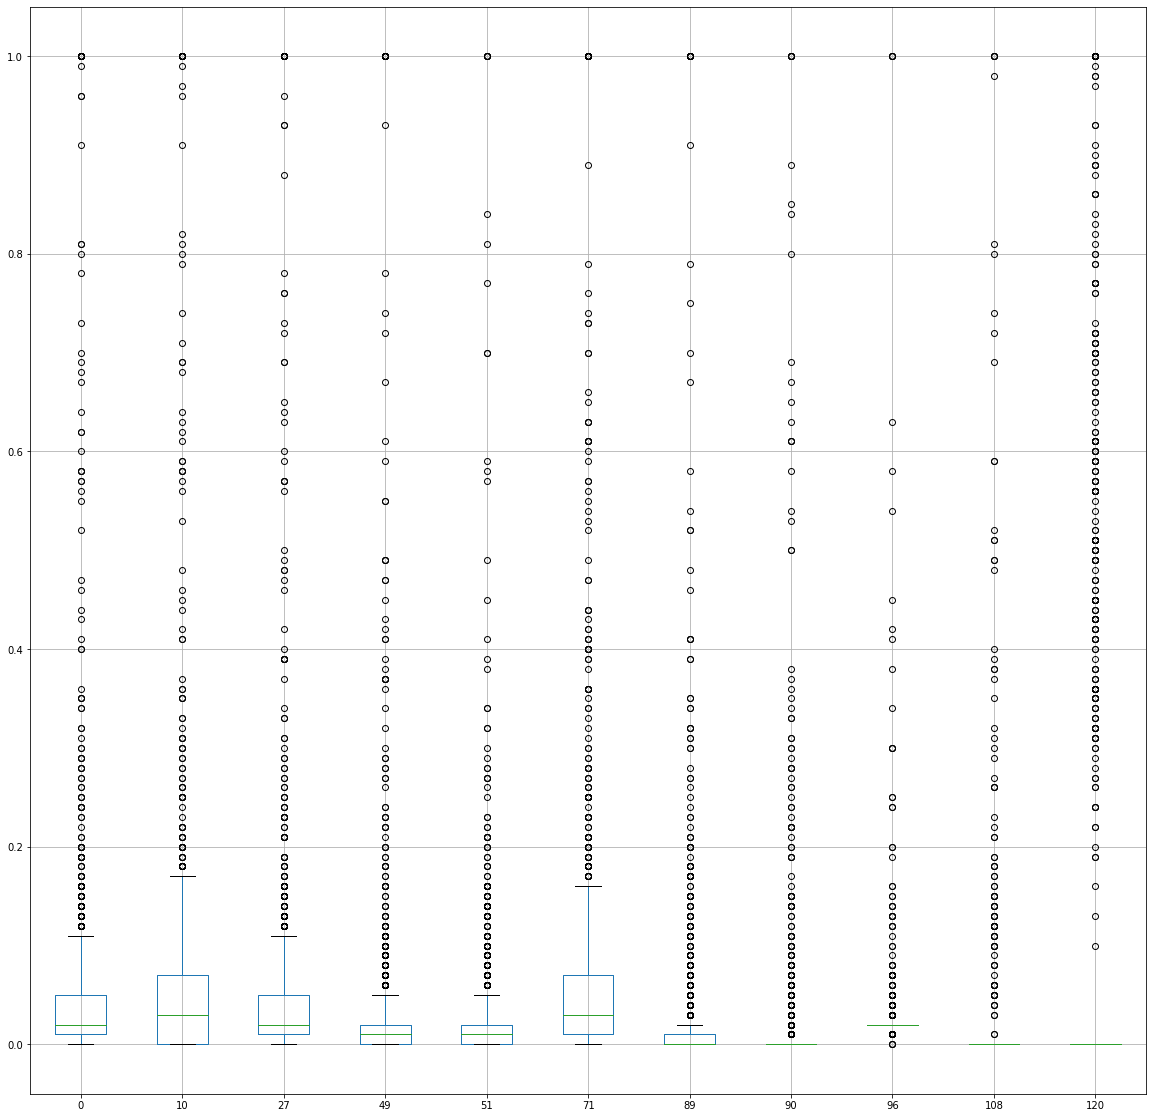

In [9]:
#boxplot
f, ax = plt.subplots(figsize=(20, 20))
boxplot = train_top11_features.boxplot(column=list(train_top11_features.columns))

    I think it's difficult to determine which feature is significant. In the scatter plot, the relationship between  result and feature is not claer. Therfore, I cannot draw a conclusion based on plots. 

## (f) Fit a linear model using least squares to the training set and report the test error

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
#process train data test data

train_x = train_data.drop([122],axis=1)
train_y = train_data[122]
test_x = test_data.drop([122],axis=1)
test_y = test_data[122]

In [11]:
Linear_model = LinearRegression().fit(train_x,train_y)
r_square = Linear_model.score(test_x,test_y)
predict_y =Linear_model.predict(test_x)
mse = MSE(test_y,predict_y)
print("result of fit a linear model using least squares: ")
print("      R suqare : ", round(r_square,3))
print("      MSE      : ", round(mse,5))

result of fit a linear model using least squares: 
      R suqare :  0.54
      MSE      :  0.02176


## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained


In [12]:
from sklearn.linear_model import RidgeCV
#initial λ which want to test
l = np.arange(-4,4.1)
l = np.power(10,l)

ridge_model = RidgeCV(alphas=l, cv=5, normalize= False).fit(train_x, train_y)
r_square = ridge_model.score(test_x,test_y)
predict_y =ridge_model.predict(test_x)
mse = MSE(test_y,predict_y)
print("result of fit a ridge model : ")
print("      Best λ   : ", ridge_model.alpha_)
print("      R suqare : ", round(r_square,3))
print("      MSE      : ", round(mse,5))

result of fit a ridge model : 
      Best λ   :  1.0
      R suqare :  0.583
      MSE      :  0.01971


## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [13]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

lasso_model = LassoCV(alphas=l, cv=5, random_state=0, normalize=False).fit(train_x, train_y)
# Test the model with test data
r_square = lasso_model.score(test_x,test_y)
predict_y =lasso_model.predict(test_x)
mse = MSE(test_y,predict_y)
print("result of fit a ridge model : ")
print("      Best λ   : ", lasso_model.alpha_)
print("      R suqare : ", round(r_square,3))
print("      MSE      : ", round(mse,5))

result of fit a ridge model : 
      Best λ   :  0.0001
      R suqare :  0.59
      MSE      :  0.0194


In [14]:
#select variables
select_variables = lasso_model.coef_ !=0
select_train_x = train_x.iloc[:, select_variables] 
select_test_x = test_x.iloc[:, select_variables]

print("selected features are : \n", list(select_train_x.columns))

selected features are : 
 [2, 4, 6, 7, 9, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 28, 29, 31, 33, 34, 36, 38, 39, 40, 44, 45, 46, 48, 49, 50, 51, 55, 59, 61, 63, 64, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 85, 86, 87, 88, 89, 90, 91, 94, 99, 100, 102, 104, 106, 107, 108, 111, 112, 113, 114, 115, 116, 118, 119]


In [15]:
#standardized features
scaler = StandardScaler().fit(train_x)
standardized_train_x = scaler.transform(train_x)
standardized_test_x = scaler.transform(test_x)

lasso_model = LassoCV(alphas=l, cv=5, random_state=0, normalize=False).fit(standardized_train_x, train_y)
# Test the model with test data
r_square = lasso_model.score(standardized_test_x,test_y)
predict_y =lasso_model.predict(standardized_test_x)
mse = MSE(test_y,predict_y)
print("result of fit a ridge model : ")
print("      Best λ   : ", lasso_model.alpha_)
print("      R suqare : ", round(r_square,3))
print("      MSE      : ", round(mse,5))

result of fit a ridge model : 
      Best λ   :  0.001
      R suqare :  0.582
      MSE      :  0.01978


    After fiiting lasso model using original data and standardized data, we can find that original data has higher accuracy, it's r-square is 0.583 and mse is 0.0197. The standardized data has lower mse. In this experiment, standardize cannot improve the accuracy of lasso model. Using original is a better choice.

## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [16]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate as CV

component_num= np.arange(1,123)
#eliminate null from whole dataset
dataset = pd.DataFrame(imp.transform(dataset)).round(2)
dataset_x = dataset.drop([122],axis=1)
dataset_y = dataset[122]

pca_error_df = pd.DataFrame()
for m in component_num:
    
    pca = PCA(n_components=int(m))
    pca_dataset_x = pd.DataFrame(pca.fit(dataset_x.T).components_.T)

    ## Select x and y
    pca_train_x = pca_dataset_x.iloc[:1495,:]
    pca_test_x = pca_dataset_x.iloc[1495:,:]
    pca_train_y = dataset_y[:1495]
    pca_test_y = dataset_y[1495:]

    # Fit the model with training data using cross validation
    model= LinearRegression()
    cv_result = CV(model, X = pca_train_x, y = pca_train_y, cv=5, scoring=('r2', 'neg_mean_squared_error'))
    # calculate r2 and mse by calculate mean of cv result
    pca_r2 = np.mean(cv_result["test_r2"]) 
    pca_mse = abs(np.mean(cv_result["test_neg_mean_squared_error"]))

    pca_error_df[m] = [pca_r2, pca_mse]
    
    print("component number :", m)
    print("     R square :",round(pca_r2, 3))
    print("     MSE      :", round(pca_mse, 5))
    
pca_error_df.T

component number : 1
     R square : 0.466
     MSE      : 0.03018
component number : 2
     R square : 0.51
     MSE      : 0.02769
component number : 3
     R square : 0.511
     MSE      : 0.02767
component number : 4
     R square : 0.527
     MSE      : 0.02671
component number : 5
     R square : 0.566
     MSE      : 0.0245
component number : 6
     R square : 0.587
     MSE      : 0.02333
component number : 7
     R square : 0.601
     MSE      : 0.02255
component number : 8
     R square : 0.644
     MSE      : 0.02014
component number : 9
     R square : 0.645
     MSE      : 0.02011
component number : 10
     R square : 0.648
     MSE      : 0.01994
component number : 11
     R square : 0.647
     MSE      : 0.02
component number : 12
     R square : 0.647
     MSE      : 0.01996
component number : 13
     R square : 0.647
     MSE      : 0.01999
component number : 14
     R square : 0.647
     MSE      : 0.01996
component number : 15
     R square : 0.646
     MSE      : 0.

,0,1
1,0.465925,0.030183
2,0.510215,0.027689
3,0.510672,0.027665
4,0.527499,0.026713
5,0.565865,0.024498
...,...,...
118,0.639995,0.020352
119,0.638812,0.020423
120,0.638281,0.020450
121,0.638234,0.020454


In [17]:
max_r2 = pca_error_df.T[0].max()
min_MSE = pca_error_df.T[1].min()
best_M = (pca_error_df.T[0] == max_r2).tolist().index(True)
print("The best M is {}, the corresponding \
r-square is {} and MSE is {}".format(best_M, round(max_r2,3), round(min_MSE,5)))

The best M is 95, the corresponding r-square is 0.657 and MSE is 0.0194


In [18]:
#use the best M=95 to calculate test error
pca = PCA(n_components=95)
pca_dataset_x = pd.DataFrame(pca.fit(dataset_x.T).components_.T)

## Select x and y
pca_train_x = pca_dataset_x.iloc[:1495,:]
pca_test_x = pca_dataset_x.iloc[1495:,:]
pca_train_y = dataset_y[:1495]
pca_test_y = dataset_y[1495:]

# Fit the model with training data using cross validation
model= LinearRegression().fit(pca_train_x, pca_train_y)
# calculate r2 and mse by calculate mean of cv result
pca_r2 = model.score(pca_test_x, pca_test_y)
pca_predict_y = model.predict(pca_test_x)
pca_mse = MSE(pca_test_y, pca_predict_y)

    
print("test result of best M=95 :",)
print("     R square :",round(pca_r2, 3))
print("     MSE      :", round(pca_mse, 5))

test result of best M=95 :
     R square : 0.617
     MSE      : 0.01824


## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost3 to fit the model tree. Determine if (the regularization term) using cross-validation

In [19]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
data_dmatrix = xgb.DMatrix(data=train_x,label=train_y)
#use λ announced previously
#build dataframe to store mse
al = np.arange(-4,4.1)
al = np.power(10,al)
xgb_MSE = pd.DataFrame([al],columns=al,index=["MSE"])
for x in al:
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': x}

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, verbose_eval=False,
                    num_boost_round=500, early_stopping_rounds=10, metrics="rmse", as_pandas=True)
    
    xg_mse = float(cv_results['test-rmse-mean'].tail(1))**2
    xgb_MSE[x] = xg_mse

[20:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [20]:
xgb_MSE.round(5)

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000,1000.0000,10000.0000
MSE,0.02012,0.01969,0.01986,0.01995,0.01967,0.02145,0.03743,0.12367,0.12367


Through the result cross validation, we can find the best α is 1.0, it's mse is 0.1967

In [21]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1, max_depth = 5, alpha = 1, n_estimators = 1000)
xg_reg.fit(train_x,train_y)
xg_preds = xg_reg.predict(test_x)
xg_r2 = xg_reg.score(test_x,test_y)
xg_mse = MSE(test_y, xg_preds)

print("test result of best α=1 :",)
print("     R square :",round(xg_r2, 3))
print("     MSE      :", round(xg_mse, 5))

[20:22:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test result of best α=1 :
     R square : 0.585
     MSE      : 0.0196


    The boosting tree method is a good choice, when we use α = 1, we get a result that rank only second to the result of PCR. Therfore, I think we can choose it in some condictions.

# 2. Tree-Based Methods

## （a)The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [22]:
#read dataset
usecol=range(171)
train_data = pd.read_csv("aps_failure_training_set.csv",skiprows=20)
test_data = pd.read_csv("aps_failure_test_set.csv",skiprows=20)

In [23]:
train_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [24]:
test_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [25]:
#split dataset into x,y
train_data.replace('na', np.nan, inplace=True)
test_data.replace('na', np.nan, inplace=True)
train_x = train_data.iloc[:,1:]
train_y = train_data["class"]
test_x = test_data.iloc[:,1:]
test_y = test_data["class"]

## (b) Data Preparation
    This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

    There are five useful way to dealing with missing value:
        1.Deleting Rows
        2.Replacing With Mean/Median/Mode
        3.Assigning An Unique Category
        4.Predicting The Missing Values
        5.Using Algorithms Which Support Missing Values
    
    In these methods. I think the second is the moset effective method. It will not influnce the size of sample and eliminate missing value quickly.

In [26]:
# using the second method: Replacing With Mean/Median/Mode
from sklearn.impute import SimpleImputer
# Using median to impute missing values
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imp.fit(train_x)
#process the round of data
train_x = pd.DataFrame(imp.transform(train_x))
imp.fit(test_x)
test_x = pd.DataFrame(imp.transform(test_x))

In [27]:
train_x

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [28]:
test_x

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean

In [29]:
from sklearn.preprocessing import Normalizer
#normalize data before calculate
normalizer = Normalizer().fit(train_x)
train_x = pd.DataFrame(normalizer.transform(train_x))
normalizer = Normalizer().fit(test_x)
test_x = pd.DataFrame(normalizer.transform(test_x))

In [30]:
#announce a cv method
cv = lambda x: np.std(x) / np.mean(x) 
#apply cv 
var = np.apply_along_axis(cv, axis = 1, arr = np.array(train_x).T)
print("the Coefficient of Variation CV for each feature :\n")
pd_var=pd.DataFrame(var, columns=["varation"])
pd_var

the Coefficient of Variation CV for each feature :



,varation
0,1.809763
1,2.904017
2,1.926711
3,2.796677
4,12.659079
...,...
165,1.886270
166,2.061377
167,4.181671
168,69.079581


### iii. Plot a correlation matrix for your features using pandas or any other tool.

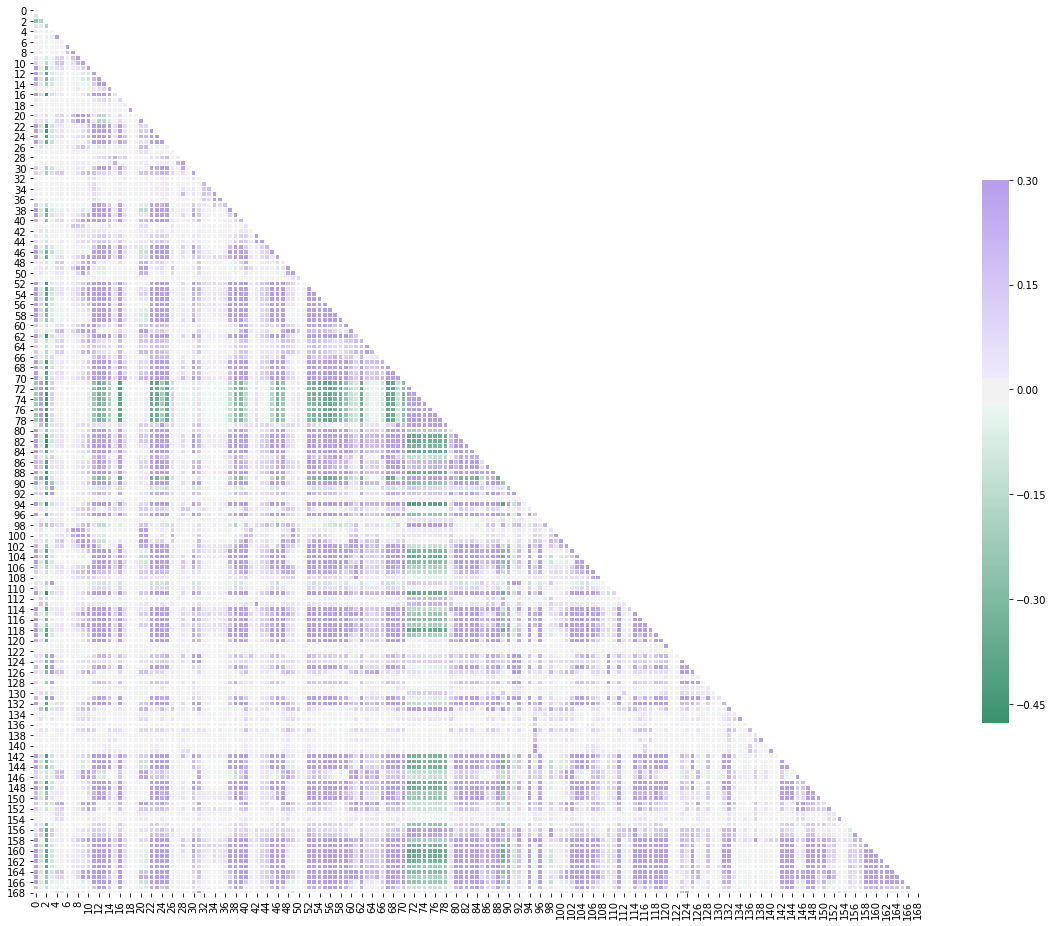

In [31]:
# Correlation Matrix
corr = train_x.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#setup a figure
f, ax = plt.subplots(figsize=(20, 20))
#Generate a brighter green-white-purple palette
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
# Draw a plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### iv. Pickup 170**1/2 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions aboutsignificance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [32]:
import math
#calculate the number of feature we should pick
pick_up_number=math.floor(pow(170,0.5))
#rank
ranks = pd_var.rank(ascending=False)
select_feature = np.array(ranks < pick_up_number+1).T
#selected train_feature
train_top13_features = train_x.iloc[: ,select_feature[0]]
train_top13_features

,6,19,27,29,51,93,122,134,136,138,153,168,169
0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,3.437888e-11,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000002,0.000018
4,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000
59996,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000
59997,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000
59998,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,8.914588e-08,0.0,0.0,0.000000,0.000000


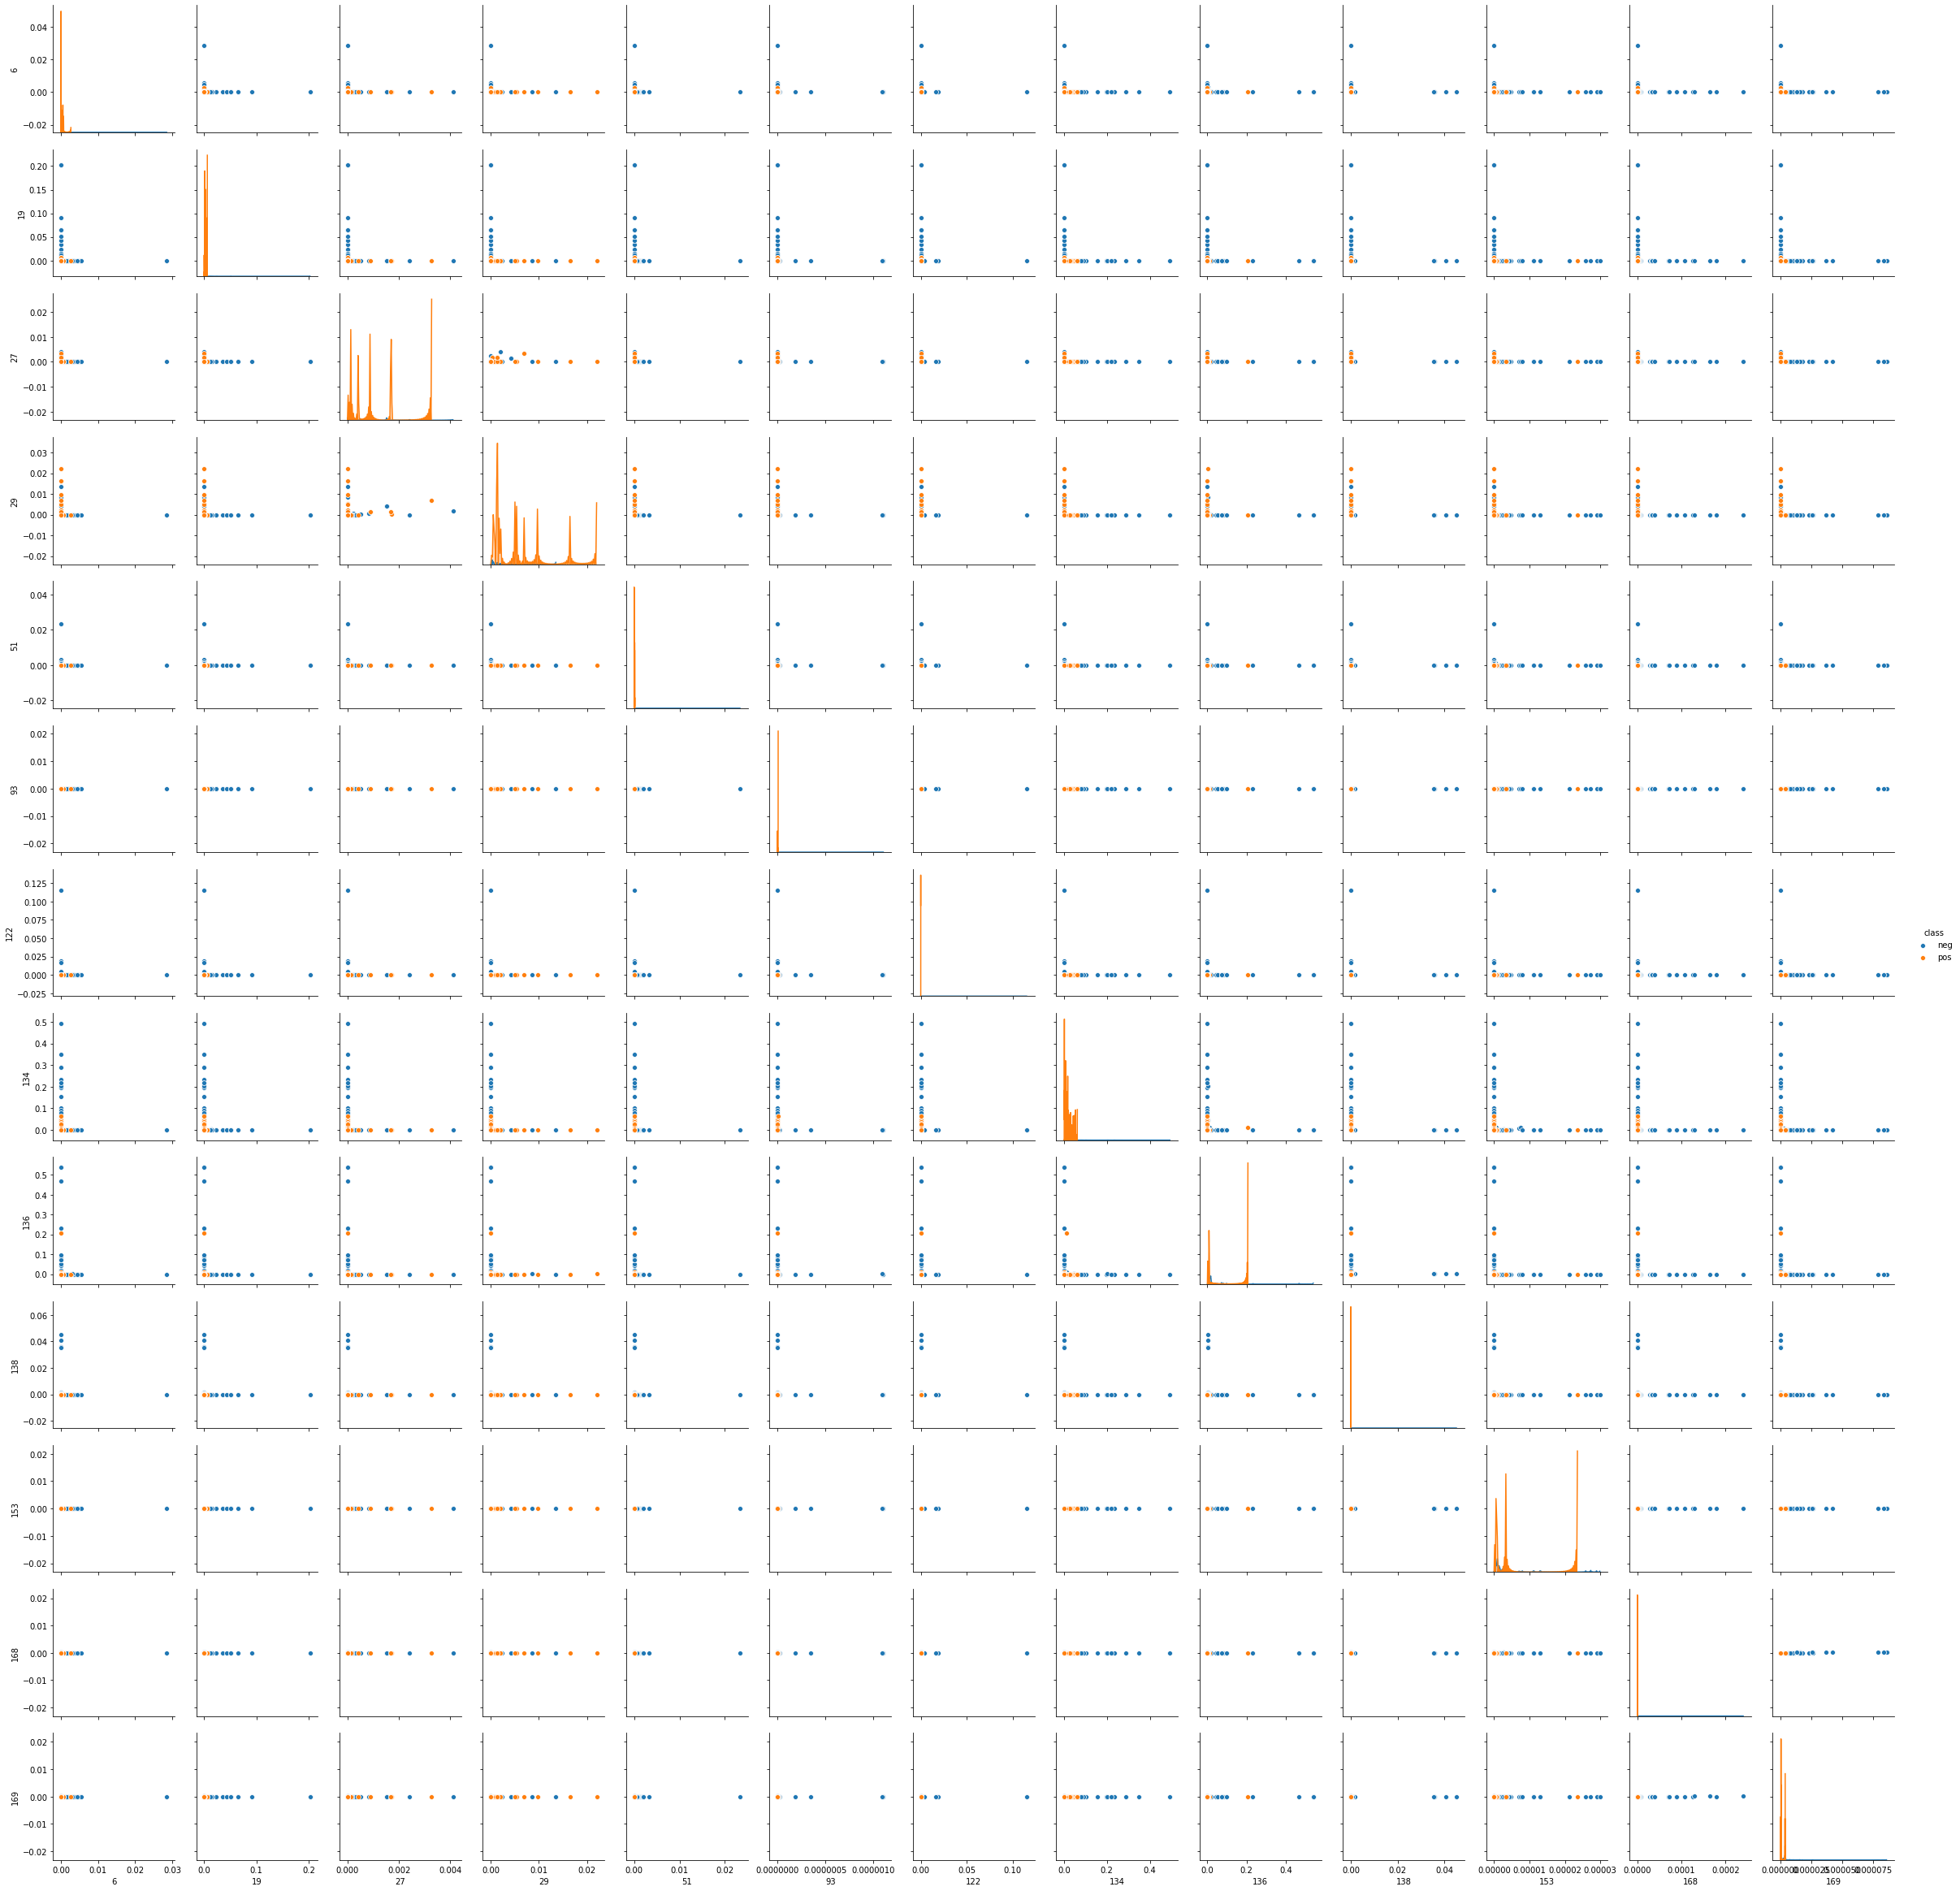

In [33]:
sns.pairplot(pd.concat([train_top13_features, train_y], axis=1), hue='class')

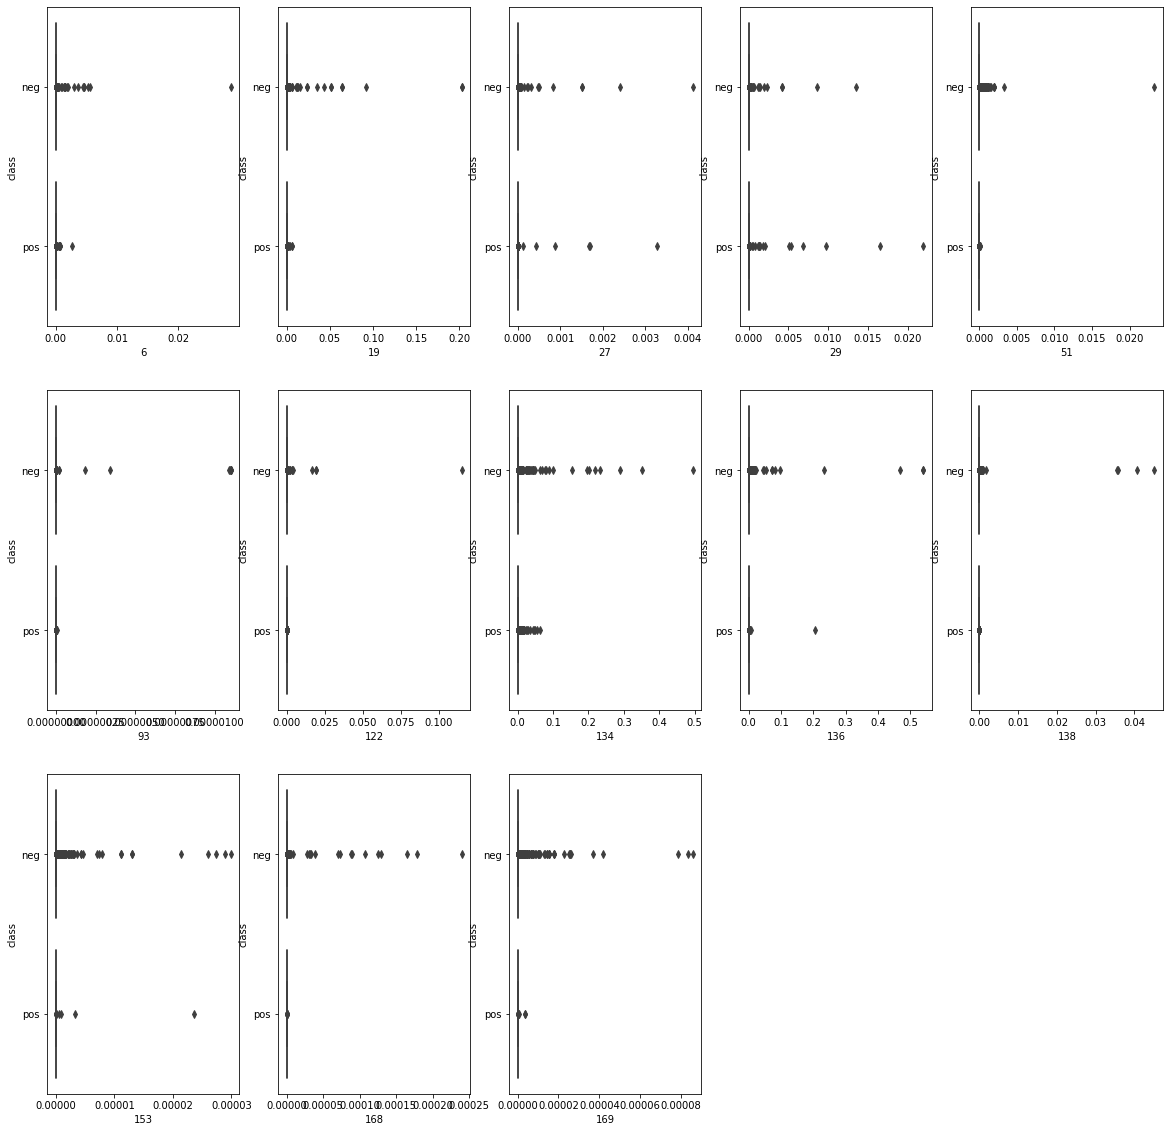

In [34]:
plt.figure(figsize=(20,20))
for i,col in enumerate(train_top13_features):
    fig = plt.subplot(3,5,i+1)
    ax = sns.boxplot(train_top13_features[col], train_y)
plt.show()

    Based on  the plot of the train dataset, it's hard for me to draw a conclusion about the signifiance of those features. I still need more analysis to make a conclusion

### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [35]:
train_y.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [36]:
test_y.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

    The positive samples are less than 5%, there is a serious imbalance, we need to use case-control metod such as SMOTE to make this dataset become balance.

## (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
#transfer binary classes to numeric
train_y = train_data["class"]
test_y = test_data["class"]
print(train_y)
num_train_y = train_y.apply(lambda x: 0 if x=='neg' else 1)
num_test_y = test_y.apply(lambda x: 0 if x=='neg' else 1)
#build model
clf = RandomForestClassifier(n_estimators=1000, max_depth=4,oob_score=True)
clf.fit(train_x, num_train_y)
train_y_pred = clf.predict(train_x)
train_y_pred_prob = clf.predict_proba(train_x)[:,1]
test_y_pred = clf.predict(test_x)
test_y_pred_prob = clf.predict_proba(test_x)[:,1]

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object


In [38]:
#confusion matrix for training data
cm = confusion_matrix(num_train_y, train_y_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,58990,10
Actual True,765,235


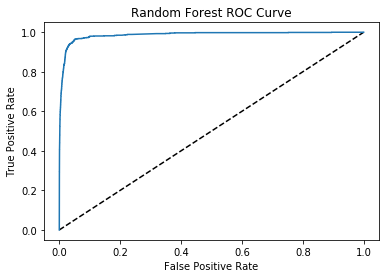

In [39]:
#ROC for training data
fpr, tpr, thresholds = metrics.roc_curve(num_train_y, train_y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [40]:
#AUC score for training data
auc_score = roc_auc_score(num_train_y, train_y_pred_prob)
print("For training data:")
print("AUC score is:", round(auc_score,3))
#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(train_x, num_train_y),3))
#F1-score of training data
print("F1 score is:", round(f1_score(num_train_y, train_y_pred),3))

For training data:
AUC score is: 0.987
Misclassification rate is: 0.013
F1 score is: 0.378


In [41]:
# confusion matrix of test data
cm = confusion_matrix(num_test_y, test_y_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,15622,3
Actual True,283,92


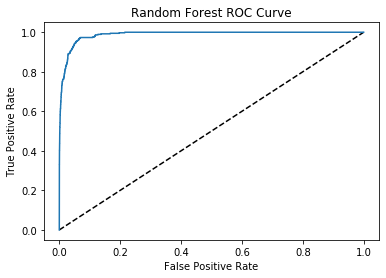

In [42]:
#ROC for test data
fpr, tpr, thresholds = metrics.roc_curve(num_test_y, test_y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [43]:
#AUC score for test data
auc_score = roc_auc_score(num_test_y, test_y_pred_prob)
print("For test data:")
print("AUC score is:", round(auc_score,3))
#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(test_x, num_test_y),3))
#F1-score of training data
print("F1 score is:", round(f1_score(num_test_y, test_y_pred),3))

For test data:
AUC score is: 0.988
Misclassification rate is: 0.018
F1 score is: 0.391


In [44]:
#Calculate Out of Bag error estimate for your random forset and compare it to the test error.
OOB_score= clf.oob_score_
print("Out of bag error is: ",round(1-OOB_score,3))
print("test error rate is : ", round(1 - clf.score(test_x, num_test_y),3))

Out of bag error is:  0.013
test error rate is :  0.018


    Through the result, we can directly see that out of bag error is smaller than test error rate, but there is not a significant different between two number. Therefore, they both useful for estimate a model. When evaluate a model, we should use both parameters.

## (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

    Influence：each tree will be biased in the same direction and magnitude (on average) by class imbalance.

In [45]:
#use SMOTE to solve the imblance problem
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(train_x, num_train_y)
smote_train_x, smote_train_y = pd.DataFrame(x), pd.Series(y)

In [46]:
#build model and train it again using somted sample
clf = RandomForestClassifier(n_estimators=1000, max_depth=4,oob_score=True)
clf.fit(smote_train_x, smote_train_y)
train_y_pred = clf.predict(smote_train_x)
train_y_pred_prob = clf.predict_proba(smote_train_x)[:,1]
test_y_pred = clf.predict(test_x)
test_y_pred_prob = clf.predict_proba(test_x)[:,1]

In [47]:
#confusion matrix for training data
cm = confusion_matrix(smote_train_y, train_y_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,54300,4700
Actual True,1348,57652


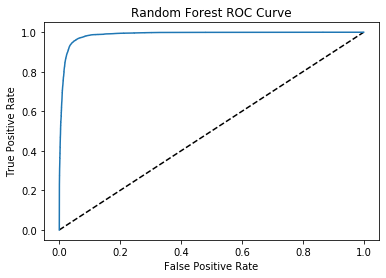

In [48]:
#ROC for training data
fpr, tpr, thresholds = metrics.roc_curve(smote_train_y, train_y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [49]:
#AUC score for training data
auc_score = roc_auc_score(smote_train_y, train_y_pred_prob)
print("For training data:")
print("AUC score is:", round(auc_score,3))
#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(smote_train_x, smote_train_y),3))
#F1-score of training data
print("F1 score is:", round(f1_score(smote_train_y, train_y_pred),3))

For training data:
AUC score is: 0.988
Misclassification rate is: 0.051
F1 score is: 0.95


In [50]:
# confusion matrix of test data
cm = confusion_matrix(num_test_y, test_y_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,14380,1245
Actual True,10,365


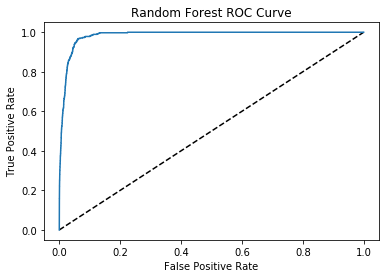

In [51]:
#ROC for test data
fpr, tpr, thresholds = metrics.roc_curve(num_test_y, test_y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [52]:
#AUC score for test data
auc_score = roc_auc_score(num_test_y, test_y_pred_prob)
print("For test data:")
print("AUC score is:", round(auc_score,3))
#misclassification rate
print("Misclassification rate is:", round(1 - clf.score(test_x, num_test_y),3))
#F1-score of training data
print("F1 score is:", round(f1_score(num_test_y, test_y_pred),3))

For test data:
AUC score is: 0.984
Misclassification rate is: 0.078
F1 score is: 0.368


In [53]:
#Calculate Out of Bag error estimate for your random forset and compare it to the test error.
OOB_score= clf.oob_score_
print("Out of bag error is: ",round(1-OOB_score,3))
print("test error rate is : ", round(1 - clf.score(test_x, num_test_y),3))

Out of bag error is:  0.052
test error rate is :  0.078


    After doing SMOTE for training data, we can directly see the training data become balance, the F1-score of training data Significantly increased. This means that eliminating imbalance is meaningful. Although the accuracy decreased when predicting test data, this problem is caused by the imbalance of test data. Therefore, we can ignore the decrease of test accuracy and make a conclusion that eliminating imbalance has a positive influence on Randomforest. 

## (e) Model Trees

In [59]:
#write data into csv
readable_train_data = pd.concat([train_x, train_y], axis = 1)
readable_test_data = pd.concat([test_x, test_y], axis = 1)
readable_train_data.to_csv("train_data.csv", index=False)
readable_test_data.to_csv("test_data.csv", index=False)

In [61]:
import weka.core.jvm as jvm
jvm.stop()
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/tingyiguo/opt/anaconda3/lib/python3.7/site-packages/javabridge-1.0.18-py3.7-macosx-10.9-x86_64.egg/javabridge/jars/rhino-1.7R4.jar', '/Users/tingyiguo/opt/anaconda3/lib/python3.7/site-packages/javabridge-1.0.18-py3.7-macosx-10.9-x86_64.egg/javabridge/jars/runnablequeue.jar', '/Users/tingyiguo/opt/anaconda3/lib/python3.7/site-packages/javabridge-1.0.18-py3.7-macosx-10.9-x86_64.egg/javabridge/jars/cpython.jar', '/Users/tingyiguo/opt/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/tingyiguo/opt/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [62]:
from weka.classifiers import Classifier
import weka.core.converters as converters
# convert dataset into the data that can be read by weka method
java_test_data = converters.load_any_file("test_data.csv")
java_test_data.class_is_last()
java_train_data = converters.load_any_file("train_data.csv")
java_train_data.class_is_last()
#build a logistic model tree
cls = Classifier(classname="weka.classifiers.trees.LMT",options=["-B"])

In [63]:
#use cv=10 to test model
from weka.classifiers import Evaluation
from weka.core.classes import Random
evl = Evaluation(java_train_data)
evl.crossvalidate_model(cls, java_train_data, 10, Random(1))

In [89]:
#result of CV
print("=== Summary of Cross-Validation ===")
print(evl.summary())
print(evl.class_details())


=== Summary of Cross-Validation ===

Correctly Classified Instances       59386               98.9767 %
Incorrectly Classified Instances       614                1.0233 %
Kappa statistic                          0.6376
Mean absolute error                      0.0148
Root mean squared error                  0.0902
Relative absolute error                 45.1088 %
Root relative squared error             70.4322 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.448    0.992      0.997    0.995      0.647    0.970     0.999     neg
                 0.552    0.003    0.769      0.552    0.643      0.647    0.970     0.676     pos
Weighted Avg.    0.990    0.441    0.989      0.990    0.989      0.647    0.970     0.994     



In [75]:
#confusion matrix
cm = pd.DataFrame(evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,58834.0,166.0
Actual True,448.0,552.0


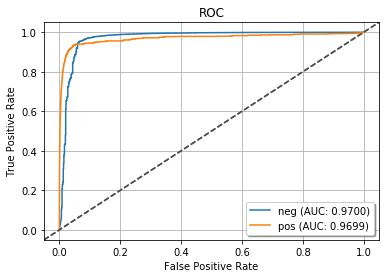

In [76]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(evl, class_index=["0", "1"], wait=True)

    From the plot of ROC, we can know: AUC=0.97

In [93]:
#show the result of test data
cls.build_classifier(java_train_data)

In [110]:
#result of test_data
test_evl = Evaluation(java_test_data)
test_evl.test_model(cls, java_test_data)
print("=== Summary of test data ===")
print(test_evl.summary())
print(test_evl.class_details())

=== Summary of test data ===

Correctly Classified Instances       15802               98.7625 %
Incorrectly Classified Instances       198                1.2375 %
Kappa statistic                          0.7232
Mean absolute error                      0.0146
Root mean squared error                  0.1031
Relative absolute error                 31.7816 %
Root relative squared error             68.1777 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.994    0.288    0.993      0.994    0.994      0.723    0.954     0.997     neg
                 0.712    0.006    0.748      0.712    0.730      0.723    0.954     0.654     pos
Weighted Avg.    0.988    0.281    0.987      0.988    0.987      0.723    0.954     0.989     



In [111]:
#confusion matrix
cm = pd.DataFrame(test_evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,15535.0,90.0
Actual True,108.0,267.0


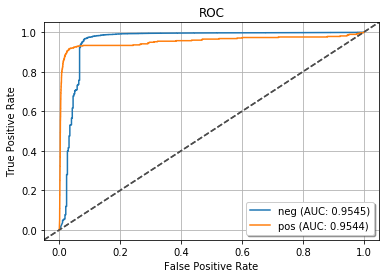

In [112]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(test_evl, class_index=["0", "1"], wait=True)

    From the plot of ROC, we can know: AUC=0.9545

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [80]:
#SMOTE data
sm = SMOTE()
x, y = sm.fit_resample(train_x, train_y)
smote_train_x, smote_train_y = pd.DataFrame(x), pd.Series(y)
smote_train_y.name = 'class'
#write data into csv after smote
readable_SMOTE_train_data = pd.concat([smote_train_x, smote_train_y], axis = 1)
readable_SMOTE_train_data.to_csv("smote_train_data.csv", index=False)
arrf_smote_train_data = converters.load_any_file("smote_train_data.csv")
arrf_smote_train_data.class_is_last()
#build a logistic model tree for smoted data
smote_cls = Classifier(classname="weka.classifiers.trees.LMT",options=["-B"])

In [82]:
#build new cv model
smote_evl = Evaluation(arrf_smote_train_data)
smote_evl.crossvalidate_model(smote_cls, arrf_smoteI’m _train_data, 10, Random(1))

In [88]:
#result of CV
print("=== Summary of Cross-Validation ===")
print(smote_evl.summary())
print(smote_evl.class_details())

=== Summary of Cross-Validation ===

Correctly Classified Instances      116067               98.3619 %
Incorrectly Classified Instances      1933                1.6381 %
Kappa statistic                          0.9672
Mean absolute error                      0.0285
Root mean squared error                  0.118 
Relative absolute error                  5.7087 %
Root relative squared error             23.603  %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.980    0.013    0.987      0.980    0.984      0.967    0.995     0.996     neg
                 0.987    0.020    0.980      0.987    0.984      0.967    0.995     0.992     pos
Weighted Avg.    0.984    0.016    0.984      0.984    0.984      0.967    0.995     0.994     



In [86]:
#confusion matrix
cm = pd.DataFrame(smote_evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,57808.0,1192.0
Actual True,741.0,58259.0


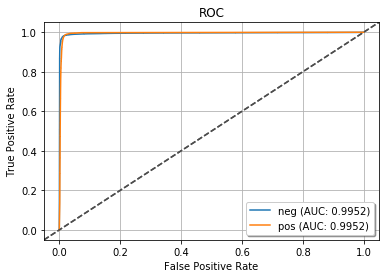

In [87]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(smote_evl, class_index=["0", "1"], wait=True)

    From the plot of ROC, we can know: AUC=0.9952

    Conclusion: After case-control, the train dataset become more balance. The result become more accurate. Although the number of FP increse, but the rate of TP increse. It mean this model become more accurate when classifty positive class. I think case-control imrove the ability of this model.

In [101]:
#test the new tree using test dataset
smote_cls.build_classifier(arrf_smote_train_data)

In [107]:
#result of test_data
smote_test_evl = Evaluation(java_test_data)
smote_test_evl.test_model(smote_cls, java_test_data)
print("=== Summary of test data after doning case-control on training data ===")
print(smote_test_evl.summary())
print(smote_test_evl.class_details())

=== Summary of test data after doning case-control on training data ===

Correctly Classified Instances       15425               96.4063 %
Incorrectly Classified Instances       575                3.5938 %
Kappa statistic                          0.5028
Mean absolute error                      0.0373
Root mean squared error                  0.1864
Relative absolute error                 81.4362 %
Root relative squared error            123.2116 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.967    0.173    0.996      0.967    0.981      0.545    0.924     0.996     neg
                 0.827    0.033    0.378      0.827    0.519      0.545    0.924     0.290     pos
Weighted Avg.    0.964    0.170    0.981      0.964    0.970      0.545    0.924     0.980     



In [108]:
#confusion matrix
cm = pd.DataFrame(smote_test_evl.confusion_matrix,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])
cm

,Predicted False,Predicted True
Actual False,15115.0,510.0
Actual True,65.0,310.0


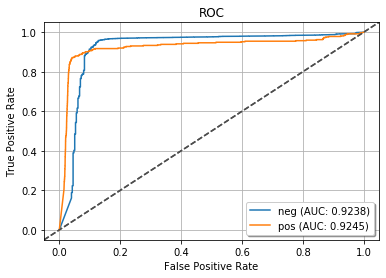

In [109]:
#print ROC 
import weka.plot.classifiers as plcls
plcls.plot_roc(smote_test_evl, class_index=["0", "1"], wait=True)

     From the plot of ROC, we can know: AUC=0.9238

    There is not an inmprovement on test result. Due to the imblance on test data.

# 3. ISLR 6.8.3
    Suppose we estimate the regression coefficients in a linear regression model by minimizing

    (a) As we increase s from 0, the training RSS will:
    
    answer: 
    iv. Steadily decrease. With the increse of s, the penalty of β will decrese, then model will become more variable and tensity fit to training data. Then, the training RSS will steadily decrease. 

    (b) Repeat (a) for test RSS
    
    answer: 
    ii. Decrease initially, and then eventually start increasing in a U shape. When S=0, βi will all be zero. Then the model will become constant number, it will have a high test RSS. With the increase of s, the model will become variable and test RSS will decrease. However, when s become larger, model will be overfit for training data. Then test RSS will increase again.

    (c) Repeat (a) for variance:
    
    answer: 
    iii. Steadily increase. With the increase of s, the penalty of β decrease, the model will become variables.

    (d)Repeat (a) for (squared) bias
    
    answer:
    iv. Steadily decrease. With the increase of s, this model will be more fit for training data. Then the bias will continue decrease.

    (e) Repeat (a) for the irreducible error
    
    answer:
    v. Remain constant. irreducible error cannot be influenced by the change of model. Therefore, it will keep constant. 

# 4. ISLR, 6.8.5

    It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.
    Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1+y2 = 0 and x11+x21 = 0 and x12+x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: ˆ β0 = 0.

    (a) Write out the ridge regression optimization problem in this setting.
    
    In this condition, what we should minimize is :
        (y1−β1x1−β2x1)**2+(y2−β1x2−β2x2)**2+λ(β21+β22)

    (b) Argue that in this setting, the ridge coefficient estimates satisfy ˆ β1 = ˆ β2.
    
    By taking the derivatives of the above expression with respect to β̂ 1 and β̂ 2 and setting them equal to 0, we obtain two equotation:
    (1) β̂1(x21+x22+λ)+β̂2(x21+x22)=y1x1+y2x2
    (2) β̂1(x21+x22)+β̂2(x21+x22+λ)=y1x1+y2x2
    
    It is obviously β1 is equal to β2

    (c) Write out the lasso optimization problem in this setting.
    
    different with ridge regression, lasso will use l1 penalty:
        (y1−β1x1−β2x1)2+(y2−β1x2−β2x2)2+λ(|β1|+|β2|)

    (d) Argue that in this setting, the lasso coefficients ˆ β1 and ˆ β2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.
    
    In lasso model, the best β is {(β̂ 1,β̂ 2):β̂ 1+β̂ 2=s with β̂ 1,β̂ 2≥0 and β̂ 1+β̂ 2=−s with β̂ 1,β̂ 2≤0}. It's not a unique answer. 

# 5. ISLR 8.4.5

    Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75
    
    There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?
    
    
    Fisrt Way: One is the majority vote approach
    In ten resluts, six results classify X to read class, therefore, we should classify X to red class.
    
    Second Way: classify based on the average probability. The average probility is 0.45 which is smller than 0.5. Therefore, we need to classify X to green class.

# 6. ISLR 9.7.3
    Here we explore the maximal margin classifier on a toy data set.

    (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
    Obs. X1 X2 Y
     1   3  4 Red
     2   2  2 Red
     3   4  4 Red
     4   1  4 Red
     5   2  1 Blue
     6   4  3 Blue
     7   4  1 Blue

In [ ]:
import matplotlib.pyplot as plt
x1 = np.array([3, 2, 4, 1, 2, 4, 4])
x2 = np.array([4, 2, 4, 4, 1, 3, 1])
color = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).
    
    the boundary is X2=X1-0.5.

In [ ]:
plt.plot([0.5, 5], [0, 4.5], 'k-')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 +β1X1 +β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.
    
    answer:
        The classification rule is “Classify to Red if X1−X2−0.5<0, and classify to Blue otherwise.”

    (d)On your sketch, indicate the margin for the maximal margin hyperplane.

In [ ]:
plt.plot([0.5, 5], [0, 4.5], 'k-')
plt.plot([0,5],[0,5], 'b--')
plt.plot([1,5],[0,4], 'r--')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (e) Indicate the support vectors for the maximal margin classifier
    
    answer:
    The support vectors are the points (2,1), (2,2), (4,3) and (4,4)

    (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane
    
    answer:
        It is claer that the seventh observation is not a support vector. Therefore, moving this observation will not influence the maximal margin.

     (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane
     
     In this question, we use x2= x1-0.2 as boundary.

In [ ]:
plt.plot([0.2, 5], [0, 4.8], 'k-')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
plt.show()

    (h)Draw an additional observation on the plot so that two classes are no longer separable by a hyperplane

In [ ]:
plt.plot([0.2, 5], [0, 4.8], 'k-')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x1, x2, c = color)
#new point
plt.scatter([3], [1], c = ["red"])
plt.show()